In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [4]:
dataset=pd.read_csv('Downloads/diabetes (1).csv')
dataset.head()
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
#replace the value of zeros in all columns with mean of the whole data

replace_zeros=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

for column in replace_zeros:
    dataset[column]=dataset[column].replace(0,np.NaN)
    mean=int(dataset[column].mean(skipna=True))
    dataset[column]=dataset[column].replace(np.NaN,mean)
    
 

In [6]:
#now let's split the dataset in train and test sets

x=dataset.iloc[:, 0:8] #here, [:,0:8] means-- (:) represents all rows and (0:8) represents from 0 till 7 columns. 0 to 7 columns will be in train set
y=dataset.iloc[:,8] #here, [:,8] means-- all rows and 8 means only last that is 9th column or 8th indiced column that is outcome will be our prediction so in test

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3)

In [7]:
#do scaling that is the values will be in different numbers that is 5, 9, 1, etc. we have to keep them in range of -1 to 1 so apply standard scalar function to keep all of them in range
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)



In [8]:
classifier=KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')


In [9]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [10]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [11]:
conf_matx=confusion_matrix(y_test,y_pred)
print(conf_matx)

[[126  18]
 [ 39  48]]


In [12]:
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.6274509803921569
0.7532467532467533


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

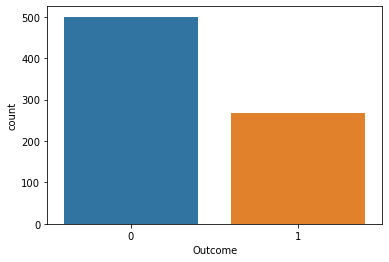

In [27]:
sns.countplot(dataset['Outcome'])

In [29]:
# try K=1 through K=11 and record testing accuracy
k_range = range(1, 11)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

print(scores)

[0.670995670995671, 0.6883116883116883, 0.7532467532467533, 0.7402597402597403, 0.7532467532467533, 0.7445887445887446, 0.7705627705627706, 0.7575757575757576, 0.7748917748917749, 0.7402597402597403]


Text(0, 0.5, 'Testing Accuracy')

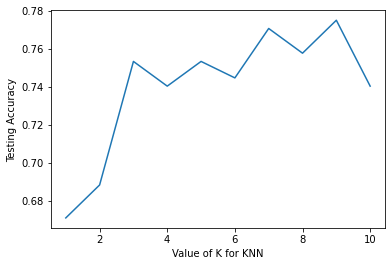

In [30]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')